$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# Classification with LDA and Logistic Regression

## Overview

In this project, LDA and linear and nonlinear logistic regression are compared by using two data sets - Wine Quality Dataset, Banknote Authentication Dataset. 

The Wine Quality dataset considers the levels of various components present in the wine and outputs its quality. Banknote Authentication Dataset classifies the data to real bank notes and duplicate bank notes.

## Required Code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import mlutils as ml
import scaledconjugategradient as scg
import qdalda as ql
from neuralnetworks import NeuralNetwork as nn
from neuralnetworks import NeuralNetworkClassifier as nnc
from __future__ import division

import math


4 functions are used in this assignment. 

* `model = trainLDA(X,T,parameters)`
* `percentCorrect = evaluateLDA(model,X,T)`
* `model = trainNN(X,T,parameters)`
* `percentCorrect = evaluateNN(model,X,T)`

The first two methods trainLDA and evaluateLDA are used for training and computing the error in the model using LDA approach.
The trainNN and evaluateNN methods are used for training and computing the error in the model using neural network regression (similar to the previous assignment).

The trainNN and trainLDA methods take the data, target values and parameters as input and output a model. The `parameters` argument for `trainNN` is a list of the hidden layers structure and the number of SCG iterations. The value of the `parameters` argument for `trainLDA` is not used.

The evaluareLDA and evaluateNN methods take the model as input and calculate the correctness percentage of the model.

The `trainValidateTestKFoldsClassification` function in `mlutils.py` is used to apply the above functions.

In [2]:
def trainLDA(X,T,parameters = None):
    lda = ql.LDA()
    lda.train(X,T)
    return {'c':lda}

In [3]:
def evaluateLDA(model,X,T):
    lda = model['c']
    c,prob,d = lda.use(X)
    return ((float(np.sum(c==T)))/float(X.shape[0])*100)

In [4]:
def trainNN(X,T,parameters):
    nnet = nnc(X.shape[1], parameters[0], len(np.unique(T)))
    nnet.train(X,T, nIterations=parameters[1], verbose=False)
    return {'net': nnet}

In [5]:
def evaluateNN(model,X,T):
    nnet = model['net']
    predict = nnet.use(X)
    return ((float(np.sum(predict==T)))/float(X.shape[0]) * 100)

## Data

### Wine Quality Dataset

The [Wine Quality data set](http://archive.ics.uci.edu/ml/datasets/Wine+Quality) is taken from the UCI Machine Learning Repository. 

This dataset consists of  red and white variants of the Portuguese "Vinho Verde" wine. In this assignment only the red wine data is used.

The dataset consists of eleven attributes. 

* fixed acidity 
* volatile acidity 
* citric acid 
* residual sugar 
* chlorides 
* free sulfur dioxide 
* total sulfur dioxide 
* density 
* pH 
* sulphates 
* alcohol

The output class variable is the wine quality and it has values in the range 0-10.

In [6]:
wineData = np.loadtxt('winequality-red.csv', delimiter = ';', skiprows=1)
XWine = wineData[:,0:11]
TWine = wineData[:,11:12]

We create class labels for the wine quality using the following method. Here we classify the data into 2 labels 5 and 10. If the wine quality is 5 then it is bad and if it is 10 then it is good.

In [7]:
def makeWineClasses(T):
    bounds = np.arange(0,10,5)
    Tclasses = -np.ones(T.shape).astype(np.int)
    for i,quality in enumerate(T):
        for k in range(len(bounds)-1):
            if bounds[k] < quality <= bounds[k+1]:
                Tclasses[i] = bounds[k+1]
        if Tclasses[i] == -1:
            Tclasses[i] = 10
    return Tclasses
Tclasses = makeWineClasses(TWine)
Tclasses

array([[ 5],
       [ 5],
       [ 5],
       ..., 
       [10],
       [ 5],
       [10]])

Now since we have the class labels, lets try to plot the attributes against the class label. 

In [8]:
wineNames =  ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
              'total sulfur dioxide','density','pH','sulphates','alcohol']
wineNames

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

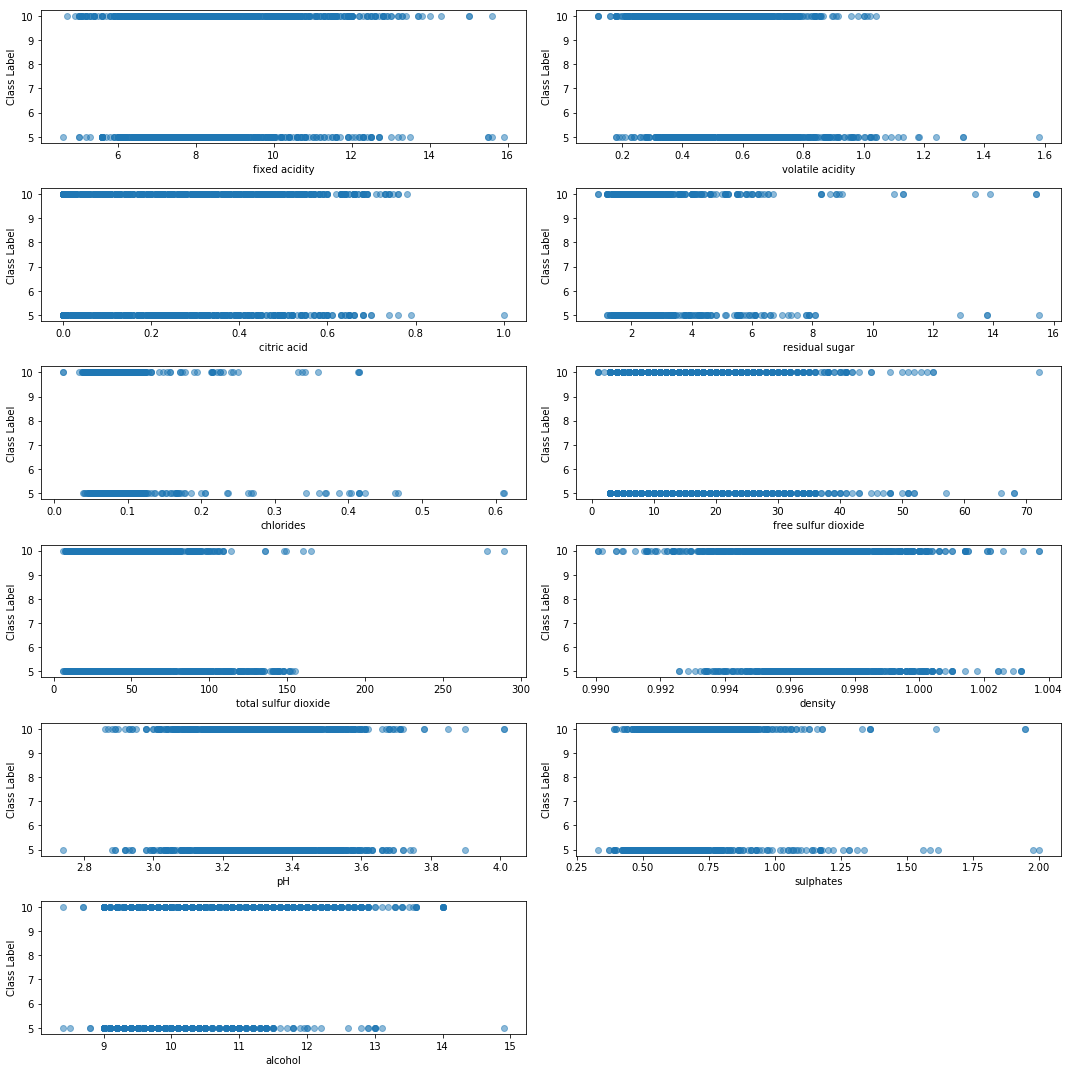

In [9]:
plt.figure(figsize=(15,15))
for c in range(XWine.shape[1]):
    plt.subplot(6,2, c+1)
    plt.plot(XWine[:,c], Tclasses, 'o', alpha=0.5)
    plt.ylabel('Class Label')
    plt.xlabel(wineNames[c])
plt.tight_layout()

From the above three plots we can imply that higher volatile acidity, total sulphur dioxide and also the higher sulpate levels always lead to bad quality of wine. 

### Banknote Authentication Dataset

The [Banknote Authentication Dataset](http://archive.ics.uci.edu/ml/datasets/banknote+authentication) is taken from the UCI Machine Learning repository.

The data is extracted from images that were taken from genuine and forged banknote-like specimens. Using a wavelet Transform tool, features were extracted from the images. 

The dataset has 5 attributes and 1372 instances.

* variance of Wavelet Transformed image  
* skewness of Wavelet Transformed image  
* curtosis of Wavelet Transformed image  
* entropy of image  
* class label

The class label tells if the Banknote is a valid one or not. It has 2 values 0,1. Value 0 indicates that it is a valid banknote and 1 indicates it is an invalid one. 

Let us now plot these values against the class label.

In [10]:
bankData = np.loadtxt('data_banknote_authentication.csv',delimiter = ',')
bankData.shape

(1372L, 5L)

In [11]:
bankNoteNames =  ['Variance','Skewness','Curtosis','Entropy']
bankNoteNames

['Variance', 'Skewness', 'Curtosis', 'Entropy']

In [12]:
XBank = bankData[:,0:4]
TBank = bankData[:,4:5]

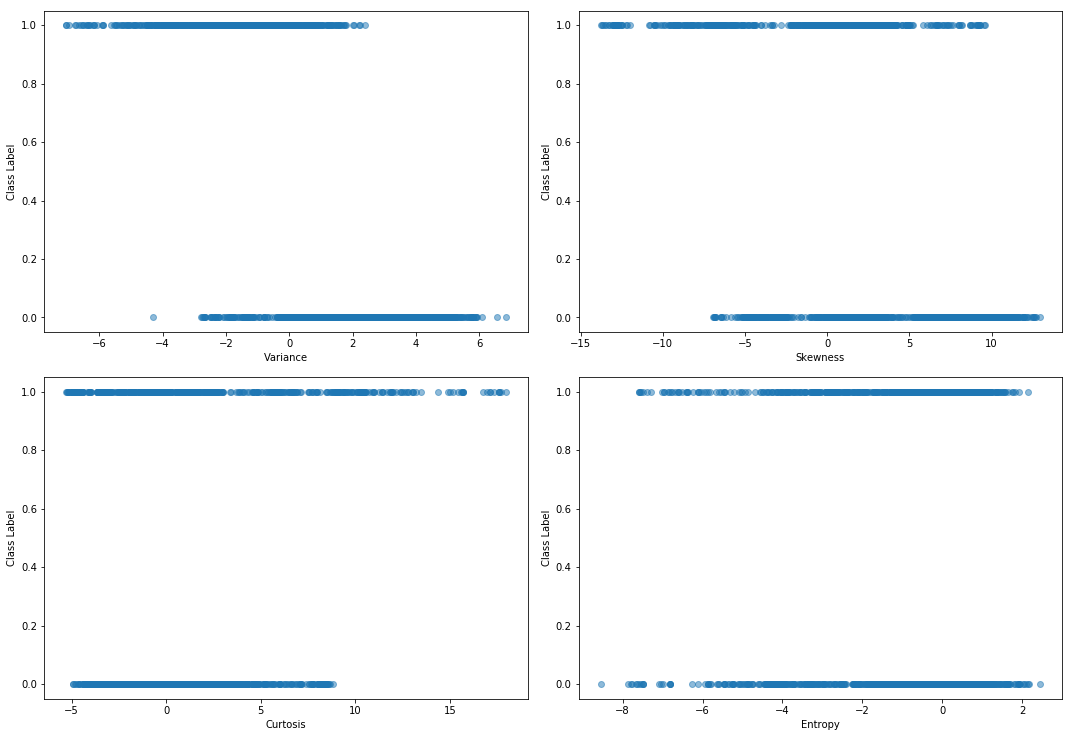

In [13]:
plt.figure(figsize=(15,15))
for c in range(XBank.shape[1]):
    plt.subplot(3,2, c+1)
    plt.plot(XBank[:,c], TBank, 'o', alpha=0.5)
    plt.ylabel('Class Label')
    plt.xlabel(bankNoteNames[c])
plt.tight_layout()

From the above plots we can say that 
* When the variance is below -3 then it is not a valid note and if it is above 3 then it is definitely a valid note.
* If the skewness is below -7 then it is not a valid note and if it is above 10 then it is a valid note. 
* If the Curtosis is above 10 then it is not a valid note.
* We cannot classify the note based on the entropy value.

## Results

### Wine Quality Dataset

Let us try applying the trainValidateTestKFoldsClassification method in mutils.py on the Wine Quality dataset. 

In [14]:
def printResults(label,results):
    print('{:4s} {:>20s}{:>8s}{:>8s}{:>8s}'.format('Algo','Parameters','TrnAcc','ValAcc','TesAcc'))
    print('-------------------------------------------------')
    for row in results:
        # 20 is expected maximum number of characters in printed parameter value list
        print('{:>4s} {:>20s} {:7.2f} {:7.2f} {:7.2f}'.format(label,str(row[0]),*row[1:]))

Applying LDA to the Wine Quality Dataset:

In [15]:
WineResultsLDA = ml.trainValidateTestKFoldsClassification( trainLDA,evaluateLDA, XWine,Tclasses, [None],
                                                       nFolds=6, shuffle=False,verbose=False)
printResults ('LDA:',WineResultsLDA)

()
Algo           Parameters  TrnAcc  ValAcc  TesAcc
-------------------------------------------------
LDA:                 None   77.07   75.51   69.56
LDA:                 None   75.58   74.80   75.99
LDA:                 None   75.86   75.23   74.82
LDA:                 None   75.78   74.48   80.47
LDA:                 None   77.98   75.82   79.08
LDA:                 None   77.47   76.45   74.35


Lets now try applying non-linear logistic regression on the same data with different hidden layers.

In [16]:
WineResultsNN = ml.trainValidateTestKFoldsClassification( trainNN,evaluateNN, XWine,Tclasses, 
                                                     [ [ [0], 10], [[10], 100] ],
                                                     nFolds=6, shuffle=False,verbose=False)
printResults('NN:',WineResultsNN)

()
Algo           Parameters  TrnAcc  ValAcc  TesAcc
-------------------------------------------------
 NN:          [[10], 100]   89.01   81.14   85.80
 NN:          [[10], 100]   89.78   79.79   89.61
 NN:          [[10], 100]   88.98   82.47   89.50
 NN:          [[10], 100]   90.10   82.01   84.81
 NN:          [[10], 100]   90.97   83.68   83.70
 NN:          [[10], 100]   91.42   86.05   66.17


In [17]:
import itertools
parms = list(itertools.product([1,5, 10, [5, 5], [10, 2, 10]], [10,100]))
WineResultsNN1 = ml.trainValidateTestKFoldsClassification( trainNN,evaluateNN, XWine,Tclasses, 
                                                     parms, nFolds=6, shuffle=False,verbose=False)
printResults('NN:',WineResultsNN1)

()
Algo           Parameters  TrnAcc  ValAcc  TesAcc
-------------------------------------------------
 NN:            (10, 100)   90.71   82.35   85.80
 NN:            (10, 100)   90.40   80.70   89.49
 NN:   ([10, 2, 10], 100)   89.28   82.51   90.36
 NN:   ([10, 2, 10], 100)   89.91   82.13   85.90
 NN:            (10, 100)   91.06   83.85   81.51
 NN:            (10, 100)   91.37   85.99   73.23


In [18]:
parms = list(itertools.product([1,2,3,4,5,[10, 2, 10]], [10,100]))
WineResultsNN2 = ml.trainValidateTestKFoldsClassification( trainNN,evaluateNN, XWine,Tclasses, 
                                                     parms, nFolds=6, shuffle=False,verbose=False)
printResults('NN:',WineResultsNN2)

()
Algo           Parameters  TrnAcc  ValAcc  TesAcc
-------------------------------------------------
 NN:   ([10, 2, 10], 100)   88.50   81.81   87.74
 NN:   ([10, 2, 10], 100)   89.78   80.80   89.73
 NN:   ([10, 2, 10], 100)   89.47   81.86   87.19
 NN:   ([10, 2, 10], 100)   90.41   82.32   85.35
 NN:   ([10, 2, 10], 100)   89.74   82.87   77.86
 NN:   ([10, 2, 10], 100)   89.84   86.66   68.77


We have seen that with hidden units as [10,2,10] and number of iterations as 100, we have got the best results for test data. Now let us try applying linear logistic regression on the same data. To do this we specify 0 hidden units.

In [19]:
WineResultsNN3 = ml.trainValidateTestKFoldsClassification( trainNN,evaluateNN, XWine,Tclasses, 
                                                     [ [[0], 0] ],
                                                     nFolds=6, shuffle=False,verbose=False)
printResults('NN:',WineResultsNN3)

()
Algo           Parameters  TrnAcc  ValAcc  TesAcc
-------------------------------------------------
 NN:             [[0], 0]   77.58   73.73   87.33
 NN:             [[0], 0]   78.67   74.16   85.19
 NN:             [[0], 0]   79.67   74.77   82.16
 NN:             [[0], 0]   80.57   75.68   77.58
 NN:             [[0], 0]   81.40   77.23   69.83
 NN:             [[0], 0]   82.16   80.42   53.90


We can see that the results yeilded by non-linear logistic regression are more accurate when compared with LDA and linear logistic regression. Also the results yeilded by linear logistic regression is better thab LDA.

Let us now try to plot the accuracy values of Test, Train and validate for LDA and non-linear logistic regression.

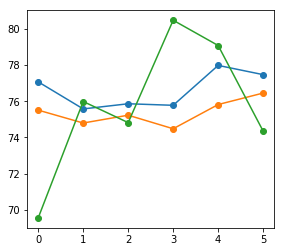

In [20]:
WineResultsLDA = np.array(WineResultsLDA)
plt.subplot2grid((1, 4), (0, 0), colspan=3)
plt.plot(WineResultsLDA[:,1:2], 'o-')
plt.plot(WineResultsLDA[:,2:3], 'o-')
plt.plot(WineResultsLDA[:,3:4], 'o-')

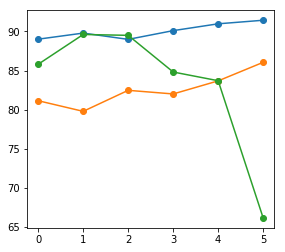

In [21]:
WineResultsNN = np.array(WineResultsNN)
plt.subplot2grid((1, 4), (0, 1), colspan=3)
plt.plot(WineResultsNN[:,1:2], 'o-')
plt.plot(WineResultsNN[:,2:3], 'o-')
plt.plot(WineResultsNN[:,3:4], 'o-')

### Banknote Authentication Dataset

Lets use the `trainValidateTestKFoldsClassification` method we calculate the error for LDA approach and Linear and Non-Linear Logistic Regression approach.

Applying LDA to the dataset:

In [22]:
BankResultsLDA = ml.trainValidateTestKFoldsClassification( trainLDA,evaluateLDA, XBank,TBank, [None],
                                                       nFolds=6, shuffle=False,verbose=False)
printResults ('LDA:',BankResultsLDA)

()
Algo           Parameters  TrnAcc  ValAcc  TesAcc
-------------------------------------------------
LDA:                 None   98.89   98.87   99.19
LDA:                 None   98.99   98.86   98.74
LDA:                 None   98.99   98.91   98.50
LDA:                 None   98.95   98.89   99.08
LDA:                 None   98.80   98.67   99.70
LDA:                 None   98.95   99.02   97.84


Now we apply the non-linear regression model

In [23]:
BankResultsNN = ml.trainValidateTestKFoldsClassification( trainNN,evaluateNN, XBank,TBank, 
                                                     [ [ [0], 10], [[10], 100] ],
                                                     nFolds=6, shuffle=False,verbose=False)
printResults('NN:',BankResultsNN)

()
Algo           Parameters  TrnAcc  ValAcc  TesAcc
-------------------------------------------------
 NN:          [[10], 100]  100.00  100.00  100.00
 NN:          [[10], 100]  100.00  100.00  100.00
 NN:          [[10], 100]  100.00  100.00  100.00
 NN:          [[10], 100]  100.00  100.00  100.00
 NN:          [[10], 100]  100.00  100.00  100.00
 NN:          [[10], 100]  100.00  100.00  100.00


In [24]:
parms = list(itertools.product([1,5,[5,5,5]], [10,100]))
BankResultsNN1 = ml.trainValidateTestKFoldsClassification( trainNN,evaluateNN, XBank,TBank, 
                                                     parms,nFolds=6, shuffle=False,verbose=False)
printResults('NN:',BankResultsNN1)

()
Algo           Parameters  TrnAcc  ValAcc  TesAcc
-------------------------------------------------
 NN:             (5, 100)  100.00  100.00  100.00
 NN:     ([5, 5, 5], 100)  100.00  100.00  100.00
 NN:             (5, 100)  100.00  100.00   99.81
 NN:             (5, 100)  100.00  100.00  100.00
 NN:     ([5, 5, 5], 100)  100.00  100.00  100.00
 NN:             (5, 100)  100.00  100.00  100.00


In [25]:
parms = list(itertools.product([[5],[5,5],[2,2,2]], [10,50,100,200]))
BankResultsNN2 = ml.trainValidateTestKFoldsClassification( trainNN,evaluateNN, XBank,TBank, 
                                                     parms,nFolds=6, shuffle=False,verbose=False)
printResults('NN:',BankResultsNN2)

()
Algo           Parameters  TrnAcc  ValAcc  TesAcc
-------------------------------------------------
 NN:           ([5], 100)  100.00  100.00  100.00
 NN:            ([5], 50)  100.00  100.00  100.00
 NN:            ([5], 50)  100.00  100.00  100.00
 NN:            ([5], 50)  100.00  100.00  100.00
 NN:            ([5], 50)  100.00  100.00  100.00
 NN:            ([5], 50)  100.00  100.00  100.00


We can see that by applying non-linear logistic regression, we get 100% accuracy for almost all the hidden layers and any number of iterations.

Lets now try applying Linear Logistic Regression:

In [26]:
BankResultsNN3 = ml.trainValidateTestKFoldsClassification( trainNN,evaluateNN, XBank,TBank, 
                                                     [ [[0], 0] ],
                                                     nFolds=6, shuffle=False,verbose=False)
printResults('NN:',WineResultsNN3)

()
Algo           Parameters  TrnAcc  ValAcc  TesAcc
-------------------------------------------------
 NN:             [[0], 0]   77.58   73.73   87.33
 NN:             [[0], 0]   78.67   74.16   85.19
 NN:             [[0], 0]   79.67   74.77   82.16
 NN:             [[0], 0]   80.57   75.68   77.58
 NN:             [[0], 0]   81.40   77.23   69.83
 NN:             [[0], 0]   82.16   80.42   53.90


From the above results we can see that Non-linear logistic regression gives the best results(similar to the above dataset). But for this dataset, LDA approach yeilds better results when compared to the Linear Logistic Regression.

Lets now plot the Test, Validate and Train accuracies for LDA and non-linear logistic regression method.

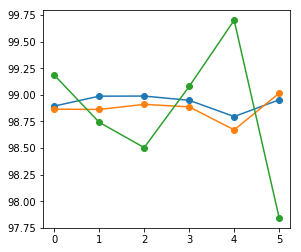

In [27]:
BankResultsLDA = np.array(BankResultsLDA)
plt.subplot2grid((1, 4), (0, 0), colspan=3)
plt.plot(BankResultsLDA[:,1:2], 'o-')
plt.plot(BankResultsLDA[:,2:3], 'o-')
plt.plot(BankResultsLDA[:,3:4], 'o-')

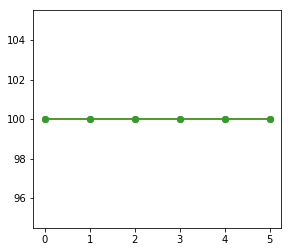

In [28]:
BankResultsNN = np.array(BankResultsNN)
plt.subplot2grid((1, 4), (0, 0), colspan=3)
plt.plot(BankResultsNN[:,1:2], 'o-')
plt.plot(BankResultsNN[:,2:3], 'o-')
plt.plot(BankResultsNN[:,3:4], 'o-')

$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$